In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
def batch_preprocess_texts(
    texts,
    nlp=None,
    remove_stopwords=True,
    remove_punct=True,
    use_lemmas=False,
    disable=["ner"],
    batch_size=50,
    n_process=-1,
):
    """Efficiently preprocess a collection of texts using nlp.pipe()

    Args:
        texts (collection of strings): collection of texts to process (e.g. df['text'])
        nlp (spacy pipe), optional): Spacy nlp pipe. Defaults to None; if None, it creates a default 'en_core_web_sm' pipe.
        remove_stopwords (bool, optional): Controls stopword removal. Defaults to True.
        remove_punct (bool, optional): Controls punctuation removal. Defaults to True.
        use_lemmas (bool, optional): lemmatize tokens. Defaults to False.
        disable (list of strings, optional): named pipeline elements to disable. Defaults to ["ner"]: Used with nlp.pipe(disable=disable)
        batch_size (int, optional): Number of texts to process in a batch. Defaults to 50.
        n_process (int, optional): Number of CPU processors to use. Defaults to -1 (meaning all CPU cores).

    Returns:
        list of tokens
    """
    # from tqdm.notebook import tqdm
    from tqdm import tqdm

    if nlp is None:
        nlp = spacy.load("en_core_web_sm")

    processed_texts = []

    for doc in tqdm(nlp.pipe(texts, disable=disable, batch_size=batch_size, n_process=n_process)):
        tokens = []
        for token in doc:
            # Check if should remove stopwords and if token is stopword
            if (remove_stopwords == True) and (token.is_stop == True):
                # Continue the loop with the next token
                continue

            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_punct == True):
                continue

            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_space == True):
                continue

            
            ## Determine final form of output list of tokens/lemmas
            if use_lemmas:
                tokens.append(token.lemma_.lower())
            else:
                tokens.append(token.text.lower())

        processed_texts.append(tokens)
    return processed_texts

In [3]:
# Load data
df_businesses = pd.read_csv("Data/yelp-business-metadata.csv.gz", index_col='business_id')
df_businesses.head()

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories
business_id,,,,,,,,,,
Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,"Doctors, Traditional Chinese Medicine, Naturop..."
mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,"Shipping Centers, Local Services, Notaries, Ma..."
tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,"Department Stores, Shopping, Fashion, Home & G..."
MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,"Brewpubs, Breweries, Food"


In [4]:
# Load in the reviews for CA 2015-2018
df = pd.read_csv('Data/yelp-reviews-CA-2015-2018.csv.gz', index_col='review_id')
df.head()

,business_id,date,text,stars,language
review_id,,,,,
8W3g9ykr8aGGZMMdVbNPKA,gGaF0TtGRx1QOFe0EzuZLg,2015-01-01 00:01:02,Lynn and Montecito flowers are simply the best...,5,en
q10HcbeBRtcvsN7WC02fFw,2CqQ3Tnvj7h0rw84WEEjMw,2015-01-01 00:15:12,Love this place! Always loved the food as they...,5,en
dXOY5UqXhcCQ6f9S-kRc2w,lOa1BVmTcbPpu05h3OPAQA,2015-01-01 00:19:36,We stayed here last weekend with our dog. Its ...,5,en
8mWVoTXecEkRXTvPONYFuw,QFh-h_OZ5Io-mBk32HN28A,2015-01-01 00:20:23,Came here for a quick bite and got the thai sa...,2,en
Xr5KEchLr-jvQiAZm1mtNA,cAbdvzqtFLaAAMFIyPf2AA,2015-01-01 00:47:19,Finally was able to try lunch at Holdren's. M...,2,en


In [5]:
# New pandas option to change: 
pd.get_option('display.max_colwidth')

50

In [6]:
# Increase column width
pd.set_option('display.max_colwidth', 250)
df.head()

,business_id,date,text,stars,language
review_id,,,,,
8W3g9ykr8aGGZMMdVbNPKA,gGaF0TtGRx1QOFe0EzuZLg,2015-01-01 00:01:02,"Lynn and Montecito flowers are simply the best. Awesome choices, friendly service and great pricing.",5,en
q10HcbeBRtcvsN7WC02fFw,2CqQ3Tnvj7h0rw84WEEjMw,2015-01-01 00:15:12,"Love this place! Always loved the food as they truly due have Killer BBQ. From pulled pork sandwiches to tri-tip the food is always a win. Now with the new location with the huge dog friendly patio, I think I just found my new favorite spot to wa...",5,en
dXOY5UqXhcCQ6f9S-kRc2w,lOa1BVmTcbPpu05h3OPAQA,2015-01-01 00:19:36,We stayed here last weekend with our dog. Its a motel style but the inside is a four star hotel. No kidding! The fireplace adds a nice touch. One block from the beach. Front desk is really nice. Could not ask for a better location. Of course this...,5,en
8mWVoTXecEkRXTvPONYFuw,QFh-h_OZ5Io-mBk32HN28A,2015-01-01 00:20:23,Came here for a quick bite and got the thai salad and a bowl of white bean chicken soup. The salad was pretty basic and the soup was lukewarm. We went around noon and most of the tables had dirty dishes from the previous customers. I asked one o...,2,en
Xr5KEchLr-jvQiAZm1mtNA,cAbdvzqtFLaAAMFIyPf2AA,2015-01-01 00:47:19,"Finally was able to try lunch at Holdren's. My husband ordered the Kobe Burger (medium), and I ordered the Pastrami Melt/Caesar salad. The $18 Kobe Burger came to the table overcooked (well), and very dry. Fries weren't hot or crispy. On top o...",2,en


In [7]:
# Filter using city
filter_city = df_businesses['city'].str.contains('Santa Barbara') 
filter_city.sum()

3836

In [8]:
# Filter using name
filter_name =  df_businesses['name'].str.contains("Sandbar")
filter_name.sum()

8

In [9]:
# Find the target business
selected_business =df_businesses.loc[ filter_name & filter_city]
selected_business

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories
business_id,,,,,,,,,,
EtM079Cj7-B3G7jPsGYb_Q,Sandbar,514 State St,Santa Barbara,CA,93101,34.417371,-119.695827,3.5,1546,"Nightlife, Arts & Entertainment, Restaurants, Dance Clubs, Bars, Music Venues, Mexican, Sports Bars"


In [10]:
# Save the business id for slicing the reviews
business_id = selected_business.index[0]
business_id

'EtM079Cj7-B3G7jPsGYb_Q'

In [11]:
# Keep reviews for the selected business
reviews = df.loc[ df['business_id']==business_id]
reviews

,business_id,date,text,stars,language
review_id,,,,,
laTog6hwC5yAIWemC_jHfA,EtM079Cj7-B3G7jPsGYb_Q,2015-01-31 12:15:07,Awesome Mexican spot! The outdoor patio at night is live and full of action. Good music and great lighting with plenty of people having a great time. I do not remember what we ordered here because it was a few months ago but it was good and I kno...,4,en
78BMrY9uWMnqo34zYj9B6g,EtM079Cj7-B3G7jPsGYb_Q,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,en
DwVApGXXWAPBVCO6LtMG8Q,EtM079Cj7-B3G7jPsGYb_Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,en
J64FTyafTlA5Ct4LwHYg2g,EtM079Cj7-B3G7jPsGYb_Q,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,en
ey05cLREtcvj2dxtJFWeFw,EtM079Cj7-B3G7jPsGYb_Q,2015-02-28 21:05:22,Not bad for the price or location. The sauces weren't that good or flavorful. My friend got the mole and it looked pretty awful. She actually scraped the sauce off. They did have a decent selection of vegetarian options though.,3,en
...,...,...,...,...,...
Y2fAC-48ze0q5P-uMbTbEg,EtM079Cj7-B3G7jPsGYb_Q,2018-12-25 22:04:08,"Hands down the best steak fajitas this native Angelena has ever had. Fun vibe, cozy, and delicious salsa. Would love to come back for happy hour next time I'm in Santa Barbara!",5,en
1n_mhEnQNnnGdYJvPJgXhw,EtM079Cj7-B3G7jPsGYb_Q,2018-12-27 01:58:23,"Came here on Christmas Day (thank god they were open). Ordered the Carne Asada and Grilled Relleno . The steak was over cooked (outer pieces), but taste decent, chili with cheese was okay, and portion was small. \n\nThe service was super duper sl...",3,en
LJcDXfNjLYsMEa99z6A_QQ,EtM079Cj7-B3G7jPsGYb_Q,2018-12-29 01:54:25,Happy hour menu and prices are great! Service is awesome. Allows small dogs. Food portions are pretty big. Left stuffed and happy.,5,en


In [12]:
# View a sample review
sample_review = reviews.iloc[0]
sample_review['text']

'Awesome Mexican spot! The outdoor patio at night is live and full of action. Good music and great lighting with plenty of people having a great time. I do not remember what we ordered here because it was a few months ago but it was good and I know we would go back next time we are in town!'

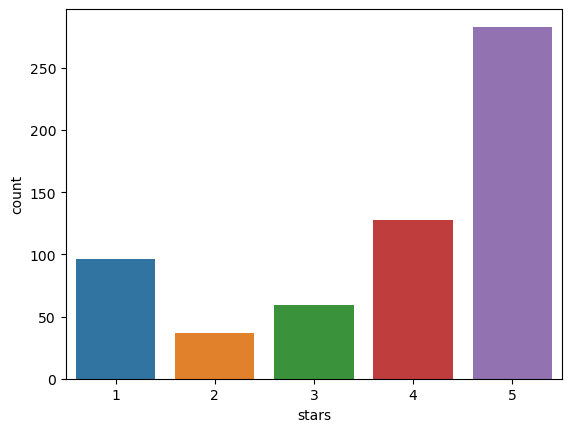

In [13]:
# How many of each star rating?
sns.countplot(data = reviews, x = 'stars');

In [14]:
# Limit data to only 1 and 5 star reviews
reviews = reviews[reviews['stars'].isin([1,5])]
reviews

,business_id,date,text,stars,language
review_id,,,,,
78BMrY9uWMnqo34zYj9B6g,EtM079Cj7-B3G7jPsGYb_Q,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,en
DwVApGXXWAPBVCO6LtMG8Q,EtM079Cj7-B3G7jPsGYb_Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,en
J64FTyafTlA5Ct4LwHYg2g,EtM079Cj7-B3G7jPsGYb_Q,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,en
5LtZZGB1dCHZswuEu7PFwQ,EtM079Cj7-B3G7jPsGYb_Q,2015-02-28 23:47:01,"Best Mexican grill and bar in Santa Barbara. Our server Lillian was the very best, Will definitely come again. Already planning breakfast tomorrow morning!",5,en
VPWNyhR3DeNfu8cmzPU7HQ,EtM079Cj7-B3G7jPsGYb_Q,2015-03-15 19:55:55,This has to be the worse service. Got seated right away and then sat and waited. No one even acknowledged we were here for a good 15 min. Then another couple was seated near us. They got asked for drinks and food order before we were even acknowl...,1,en
...,...,...,...,...,...
IgCV2QnCQdheaTM8e9Un3w,EtM079Cj7-B3G7jPsGYb_Q,2018-12-18 03:07:20,"Went on 12/13/18 with a group of friends and ordered ""the nachos"". Once we got the nachos mid way through we found about 3 pieces of paper which looked like straw covers. Manager has no empathy to this situation. Absolutely unnecessary and disgus...",1,en
f4xpggDD1X2AQdaG2eqGiw,EtM079Cj7-B3G7jPsGYb_Q,2018-12-24 22:28:57,"This is a really cool place. Santa Barbara has a bunch of nice places to eat and I can definitely recommend that this place is one of them. Our server was super cool, very easy to talk to and took care of everything we ordered. It also was pretty...",5,en
Y2fAC-48ze0q5P-uMbTbEg,EtM079Cj7-B3G7jPsGYb_Q,2018-12-25 22:04:08,"Hands down the best steak fajitas this native Angelena has ever had. Fun vibe, cozy, and delicious salsa. Would love to come back for happy hour next time I'm in Santa Barbara!",5,en


In [15]:
# What languages are represented?
reviews['language'].value_counts()

en    378
de      1
Name: language, dtype: int64

In [16]:
# Limit data to only English
reviews = reviews[reviews['language']=='en']
reviews['language'].value_counts()

en    378
Name: language, dtype: int64

In [17]:
# How many 1 and 5 star reviews?
reviews['stars'].value_counts()

5    282
1     96
Name: stars, dtype: int64

In [18]:
# Drop business_id and language
reviews = reviews.drop(columns=['business_id', 'language'])
# Make data a datetime object
reviews['date'] = pd.to_datetime(reviews['date'])
reviews.head()

,date,text,stars
review_id,,,
78BMrY9uWMnqo34zYj9B6g,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5
DwVApGXXWAPBVCO6LtMG8Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5
J64FTyafTlA5Ct4LwHYg2g,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1
5LtZZGB1dCHZswuEu7PFwQ,2015-02-28 23:47:01,"Best Mexican grill and bar in Santa Barbara. Our server Lillian was the very best, Will definitely come again. Already planning breakfast tomorrow morning!",5
VPWNyhR3DeNfu8cmzPU7HQ,2015-03-15 19:55:55,This has to be the worse service. Got seated right away and then sat and waited. No one even acknowledged we were here for a good 15 min. Then another couple was seated near us. They got asked for drinks and food order before we were even acknowl...,1


In [19]:
# Preprocessing Pipeline

import spacy
# Disable parser and ner
nlp_light = spacy.load("en_core_web_sm", disable=['parser','ner'])
# Print active components
nlp_light.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [20]:
# batch preprocess the text and store tokens
reviews['tokens'] = batch_preprocess_texts(reviews['text'], nlp = nlp_light)
reviews.head()

378it [00:08, 45.03it/s]


,date,text,stars,tokens
review_id,,,,
78BMrY9uWMnqo34zYj9B6g,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,"[randomly, popped, sandbar, spending, morning, shopping, santa, barbara, completely, blown, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, ordered, tacos, happier, ordered, grilled, veggie, tacos, s..."
DwVApGXXWAPBVCO6LtMG8Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,"[place, turned, years, noticed, bad, review, 2009, felt, update, place, run, completely, differently, food, excellent, staff, courteous]"
J64FTyafTlA5Ct4LwHYg2g,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,"[pretty, disappointed, went, opening, night, remodel, good, time, went, night, group, friends, state, id, believe, santa, barbara, tourist, town, going, years, issue, az, id, gave, credit, card, california, sales, license, work, license, good, 25..."
5LtZZGB1dCHZswuEu7PFwQ,2015-02-28 23:47:01,"Best Mexican grill and bar in Santa Barbara. Our server Lillian was the very best, Will definitely come again. Already planning breakfast tomorrow morning!",5,"[best, mexican, grill, bar, santa, barbara, server, lillian, best, definitely, come, planning, breakfast, tomorrow, morning]"
VPWNyhR3DeNfu8cmzPU7HQ,2015-03-15 19:55:55,This has to be the worse service. Got seated right away and then sat and waited. No one even acknowledged we were here for a good 15 min. Then another couple was seated near us. They got asked for drinks and food order before we were even acknowl...,1,"[worse, service, got, seated, right, away, sat, waited, acknowledged, good, 15, min, couple, seated, near, got, asked, drinks, food, order, acknowledged, finally, waiter, came, took, order, left, got, chips, finished, waiter, asked, wanted, said,..."


In [21]:
# batch preprocess the text and store tokens
reviews['tokens'] = batch_preprocess_texts(reviews['text'], nlp = nlp_light)
reviews.head()

378it [00:08, 46.57it/s]


,date,text,stars,tokens
review_id,,,,
78BMrY9uWMnqo34zYj9B6g,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,"[randomly, popped, sandbar, spending, morning, shopping, santa, barbara, completely, blown, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, ordered, tacos, happier, ordered, grilled, veggie, tacos, s..."
DwVApGXXWAPBVCO6LtMG8Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,"[place, turned, years, noticed, bad, review, 2009, felt, update, place, run, completely, differently, food, excellent, staff, courteous]"
J64FTyafTlA5Ct4LwHYg2g,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,"[pretty, disappointed, went, opening, night, remodel, good, time, went, night, group, friends, state, id, believe, santa, barbara, tourist, town, going, years, issue, az, id, gave, credit, card, california, sales, license, work, license, good, 25..."
5LtZZGB1dCHZswuEu7PFwQ,2015-02-28 23:47:01,"Best Mexican grill and bar in Santa Barbara. Our server Lillian was the very best, Will definitely come again. Already planning breakfast tomorrow morning!",5,"[best, mexican, grill, bar, santa, barbara, server, lillian, best, definitely, come, planning, breakfast, tomorrow, morning]"
VPWNyhR3DeNfu8cmzPU7HQ,2015-03-15 19:55:55,This has to be the worse service. Got seated right away and then sat and waited. No one even acknowledged we were here for a good 15 min. Then another couple was seated near us. They got asked for drinks and food order before we were even acknowl...,1,"[worse, service, got, seated, right, away, sat, waited, acknowledged, good, 15, min, couple, seated, near, got, asked, drinks, food, order, acknowledged, finally, waiter, came, took, order, left, got, chips, finished, waiter, asked, wanted, said,..."


In [22]:
# batch preprocess the text and store lemmas
reviews['lemmas'] = batch_preprocess_texts(reviews['text'], nlp = nlp_light, use_lemmas = True)
reviews.head()

378it [00:08, 46.44it/s]


,date,text,stars,tokens,lemmas
review_id,,,,,
78BMrY9uWMnqo34zYj9B6g,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,"[randomly, popped, sandbar, spending, morning, shopping, santa, barbara, completely, blown, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, ordered, tacos, happier, ordered, grilled, veggie, tacos, s...","[randomly, pop, sandbar, spend, morning, shopping, santa, barbara, completely, blow, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, order, taco, happy, order, grill, veggie, tacos, spice, cool, ques..."
DwVApGXXWAPBVCO6LtMG8Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,"[place, turned, years, noticed, bad, review, 2009, felt, update, place, run, completely, differently, food, excellent, staff, courteous]","[place, turn, year, notice, bad, review, 2009, feel, update, place, run, completely, differently, food, excellent, staff, courteous]"
J64FTyafTlA5Ct4LwHYg2g,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,"[pretty, disappointed, went, opening, night, remodel, good, time, went, night, group, friends, state, id, believe, santa, barbara, tourist, town, going, years, issue, az, id, gave, credit, card, california, sales, license, work, license, good, 25...","[pretty, disappointed, go, opening, night, remodel, good, time, go, night, group, friend, state, id, believe, santa, barbara, tourist, town, go, year, issue, az, id, give, credit, card, california, sale, license, work, license, good, 25yr, old, r..."
5LtZZGB1dCHZswuEu7PFwQ,2015-02-28 23:47:01,"Best Mexican grill and bar in Santa Barbara. Our server Lillian was the very best, Will definitely come again. Already planning breakfast tomorrow morning!",5,"[best, mexican, grill, bar, santa, barbara, server, lillian, best, definitely, come, planning, breakfast, tomorrow, morning]","[well, mexican, grill, bar, santa, barbara, server, lillian, good, definitely, come, plan, breakfast, tomorrow, morning]"
VPWNyhR3DeNfu8cmzPU7HQ,2015-03-15 19:55:55,This has to be the worse service. Got seated right away and then sat and waited. No one even acknowledged we were here for a good 15 min. Then another couple was seated near us. They got asked for drinks and food order before we were even acknowl...,1,"[worse, service, got, seated, right, away, sat, waited, acknowledged, good, 15, min, couple, seated, near, got, asked, drinks, food, order, acknowledged, finally, waiter, came, took, order, left, got, chips, finished, waiter, asked, wanted, said,...","[bad, service, got, seat, right, away, sit, wait, acknowledge, good, 15, min, couple, seat, near, get, ask, drink, food, order, acknowledge, finally, waiter, come, take, order, leave, get, chip, finish, waiter, ask, want, say, yes, get, chip, wai..."


In [23]:
# View a sample of tokens
sample_review = reviews.iloc[0]
sample_review['tokens']

['randomly',
 'popped',
 'sandbar',
 'spending',
 'morning',
 'shopping',
 'santa',
 'barbara',
 'completely',
 'blown',
 'away',
 'let',
 'start',
 'staff',
 'person',
 'contact',
 'happy',
 'engaging',
 'friendly',
 'great',
 'start',
 'experience',
 'ordered',
 'tacos',
 'happier',
 'ordered',
 'grilled',
 'veggie',
 'tacos',
 'spice',
 'cooled',
 'queso',
 'fresco',
 'hubby',
 'ordered',
 'chicken',
 'tacos',
 'spicy',
 'veggie',
 'ones',
 'spicy',
 'inhaled',
 'sets',
 'tacos',
 'elevated',
 'level',
 'homemade',
 'tortillas',
 'simply',
 'delicious',
 'authentic']

In [24]:
# confirm data type of tokens
type(sample_review['tokens'])

list

In [25]:
# confirm data type of lemmas
type(sample_review['lemmas'])

list

In [26]:
# Join list of tokens into a string with spaces between each token
reviews['tokens-joined'] = reviews['tokens'].map(lambda x: " ".join(x))
# Join list of lemmas into a string with spaces between each lemma
reviews['lemmas-joined'] = reviews['lemmas'].map(lambda x: " ".join(x))
reviews.head(3)

,date,text,stars,tokens,lemmas,tokens-joined,lemmas-joined
review_id,,,,,,,
78BMrY9uWMnqo34zYj9B6g,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,"[randomly, popped, sandbar, spending, morning, shopping, santa, barbara, completely, blown, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, ordered, tacos, happier, ordered, grilled, veggie, tacos, s...","[randomly, pop, sandbar, spend, morning, shopping, santa, barbara, completely, blow, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, order, taco, happy, order, grill, veggie, tacos, spice, cool, ques...",randomly popped sandbar spending morning shopping santa barbara completely blown away let start staff person contact happy engaging friendly great start experience ordered tacos happier ordered grilled veggie tacos spice cooled queso fresco hubby...,randomly pop sandbar spend morning shopping santa barbara completely blow away let start staff person contact happy engaging friendly great start experience order taco happy order grill veggie tacos spice cool queso fresco hubby order chicken tac...
DwVApGXXWAPBVCO6LtMG8Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,"[place, turned, years, noticed, bad, review, 2009, felt, update, place, run, completely, differently, food, excellent, staff, courteous]","[place, turn, year, notice, bad, review, 2009, feel, update, place, run, completely, differently, food, excellent, staff, courteous]",place turned years noticed bad review 2009 felt update place run completely differently food excellent staff courteous,place turn year notice bad review 2009 feel update place run completely differently food excellent staff courteous
J64FTyafTlA5Ct4LwHYg2g,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,"[pretty, disappointed, went, opening, night, remodel, good, time, went, night, group, friends, state, id, believe, santa, barbara, tourist, town, going, years, issue, az, id, gave, credit, card, california, sales, license, work, license, good, 25...","[pretty, disappointed, go, opening, night, remodel, good, time, go, night, group, friend, state, id, believe, santa, barbara, tourist, town, go, year, issue, az, id, give, credit, card, california, sale, license, work, license, good, 25yr, old, r...",pretty disappointed went opening night remodel good time went night group friends state id believe santa barbara tourist town going years issue az id gave credit card california sales license work license good 25yrs old rejected id lady asked pas...,pretty disappointed go opening night remodel good time go night group friend state id believe santa barbara tourist town go year issue az id give credit card california sale license work license good 25yr old reject id lady ask passport american ...


In [27]:
# Define first review as sample
sample_review = reviews.iloc[0]
# confirm data type of tokens-joined
print(type(sample_review['tokens-joined']))
# confirm data type of lemmas-joined
print(type(sample_review['lemmas-joined']))

<class 'str'>
<class 'str'>


In [28]:
# Preview the tokens-joined into a single string
sample_review['tokens-joined']

'randomly popped sandbar spending morning shopping santa barbara completely blown away let start staff person contact happy engaging friendly great start experience ordered tacos happier ordered grilled veggie tacos spice cooled queso fresco hubby ordered chicken tacos spicy veggie ones spicy inhaled sets tacos elevated level homemade tortillas simply delicious authentic'

**Comparing Groups: Word Clouds**

In [29]:
# Preview dataset from previous lesson
reviews.head(3)

,date,text,stars,tokens,lemmas,tokens-joined,lemmas-joined
review_id,,,,,,,
78BMrY9uWMnqo34zYj9B6g,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,"[randomly, popped, sandbar, spending, morning, shopping, santa, barbara, completely, blown, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, ordered, tacos, happier, ordered, grilled, veggie, tacos, s...","[randomly, pop, sandbar, spend, morning, shopping, santa, barbara, completely, blow, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, order, taco, happy, order, grill, veggie, tacos, spice, cool, ques...",randomly popped sandbar spending morning shopping santa barbara completely blown away let start staff person contact happy engaging friendly great start experience ordered tacos happier ordered grilled veggie tacos spice cooled queso fresco hubby...,randomly pop sandbar spend morning shopping santa barbara completely blow away let start staff person contact happy engaging friendly great start experience order taco happy order grill veggie tacos spice cool queso fresco hubby order chicken tac...
DwVApGXXWAPBVCO6LtMG8Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,"[place, turned, years, noticed, bad, review, 2009, felt, update, place, run, completely, differently, food, excellent, staff, courteous]","[place, turn, year, notice, bad, review, 2009, feel, update, place, run, completely, differently, food, excellent, staff, courteous]",place turned years noticed bad review 2009 felt update place run completely differently food excellent staff courteous,place turn year notice bad review 2009 feel update place run completely differently food excellent staff courteous
J64FTyafTlA5Ct4LwHYg2g,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,"[pretty, disappointed, went, opening, night, remodel, good, time, went, night, group, friends, state, id, believe, santa, barbara, tourist, town, going, years, issue, az, id, gave, credit, card, california, sales, license, work, license, good, 25...","[pretty, disappointed, go, opening, night, remodel, good, time, go, night, group, friend, state, id, believe, santa, barbara, tourist, town, go, year, issue, az, id, give, credit, card, california, sale, license, work, license, good, 25yr, old, r...",pretty disappointed went opening night remodel good time went night group friends state id believe santa barbara tourist town going years issue az id gave credit card california sales license work license good 25yrs old rejected id lady asked pas...,pretty disappointed go opening night remodel good time go night group friend state id believe santa barbara tourist town go year issue az id give credit card california sale license work license good 25yr old reject id lady ask passport american ...


In [30]:
# Create filters for 1 and 5 star reviews
filter_high = reviews['stars'] == 5
filter_low = reviews['stars'] == 1
filter_high.sum(), filter_low.sum()

(282, 96)

In [31]:
# Word Clouds

from wordcloud import WordCloud

In [32]:
# Make a single giant string with entire group of 5 star reviews
high_reviews_text = " ".join( reviews.loc[filter_high, 'text'])
print(high_reviews_text[:1000],"\n")

We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away!  Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly.  What a great start to the experience.  We both ordered tacos and couldn't have been happier.  I ordered the grilled veggie tacos - they had some spice but were cooled by the queso fresco.  Hubby ordered the chicken tacos and though more spicy than the veggie ones, weren't so spicy that they couldn't be inhaled!  Both sets of tacos were elevated to the next level by the homemade tortillas.  Simply delicious and authentic. This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous. Best Mexican grill and bar in Santa Barbara. Our server Lillian was the very best, Will definitely come again. A

In [33]:
# Make a single giant string with entire group of 1 star reviews
low_reviews_text = " ".join( reviews.loc[filter_low, 'text'])
print(low_reviews_text[:1000],"\n")

Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a "tourist town". I Had been going there for years and never had an issue with my AZ ID. I gave them my credit card, my California sales license and a work license and still was not good enough. I am 25yrs old.. They rejected my ID the lady asked me for a passport. Now What would I, an American in America be caring around my passport for??  will not be bringing my business there. See Ya sandbar. This has to be the worse service. Got seated right away and then sat and waited. No one even acknowledged we were here for a good 15 min. Then another couple was seated near us. They got asked for drinks and food order before we were even acknowledged. Finally our waiter came, took our order and left. We got chips and finished them. Waiter asked if we wanted more, we said yes.

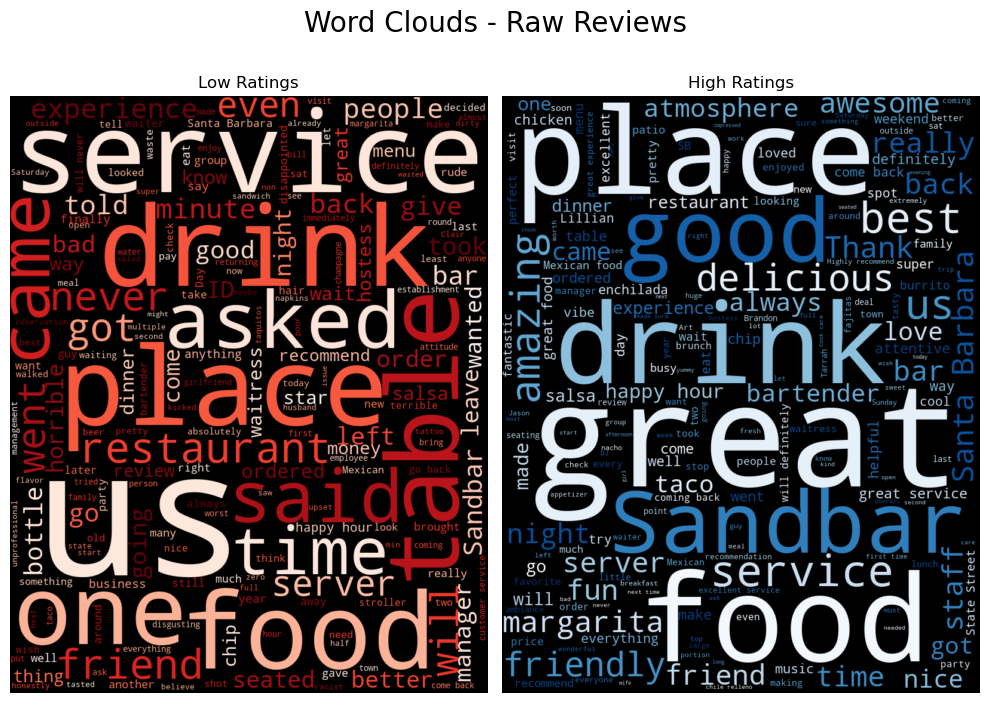

In [34]:
# Make word clouds of raw text
# Create an instance of a WordCloud and use the generate method
low_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2, colormap="Reds",
                     ).generate(low_reviews_text)
high_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,
                       colormap="Blues",
                      ).generate(high_reviews_text)
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(low_cloud, interpolation='bilinear')
axes[0].set_title("Low Ratings")
axes[1].imshow(high_cloud, interpolation='bilinear')
axes[1].set_title("High Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('Word Clouds - Raw Reviews', fontsize=20, y=1.05);

In [35]:
# Make a single giant string with entire group of 5 star tokens
high_reviews_tokens = " ".join( reviews.loc[filter_high, 'tokens-joined'])
# Make a single giant string with entire group of 1 star tokens
low_reviews_tokens = " ".join( reviews.loc[filter_low, 'tokens-joined'])

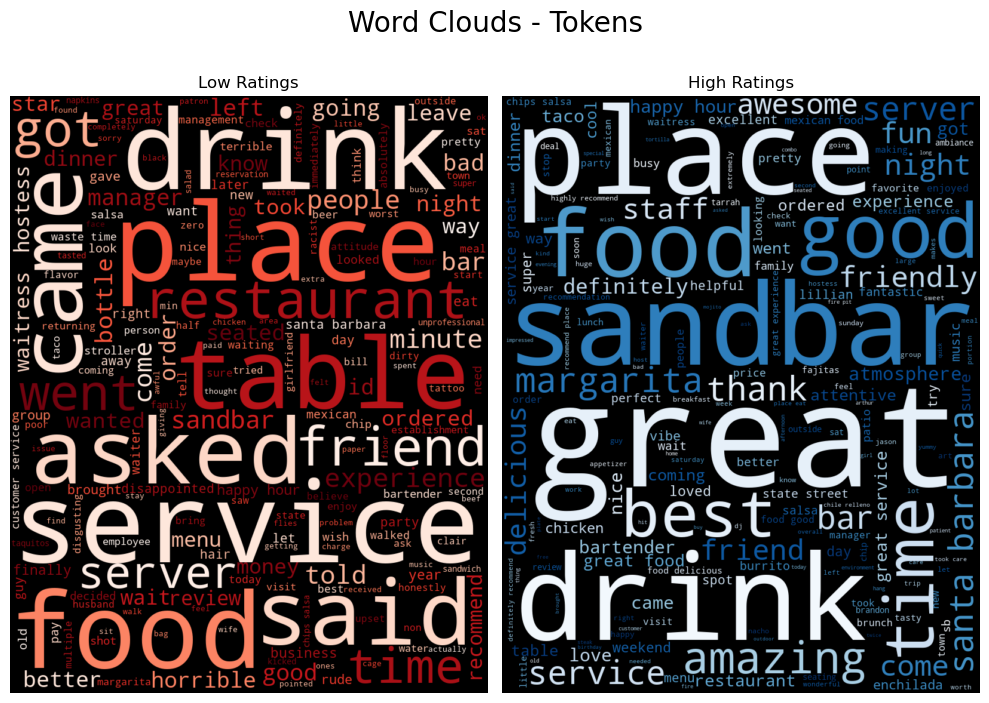

In [36]:
# Make word clouds of processed tokens
# Create an instance of a WordCloud and use the generate method
low_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2, colormap="Reds",
                     ).generate(low_reviews_tokens)
high_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,
                       colormap="Blues",
                      ).generate(high_reviews_tokens)
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(low_cloud, interpolation='bilinear')
axes[0].set_title("Low Ratings")
axes[1].imshow(high_cloud, interpolation='bilinear')
axes[1].set_title("High Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('Word Clouds - Tokens', fontsize=20, y=1.05);

In [37]:
# Word Clouds of Tokenized Text

In [38]:
# Make a single giant string with entire group of 5 star tokens
high_reviews_tokens = " ".join( reviews.loc[filter_high, 'tokens-joined'])
# Make a single giant string with entire group of 1 star tokens
low_reviews_tokens = " ".join( reviews.loc[filter_low, 'tokens-joined'])

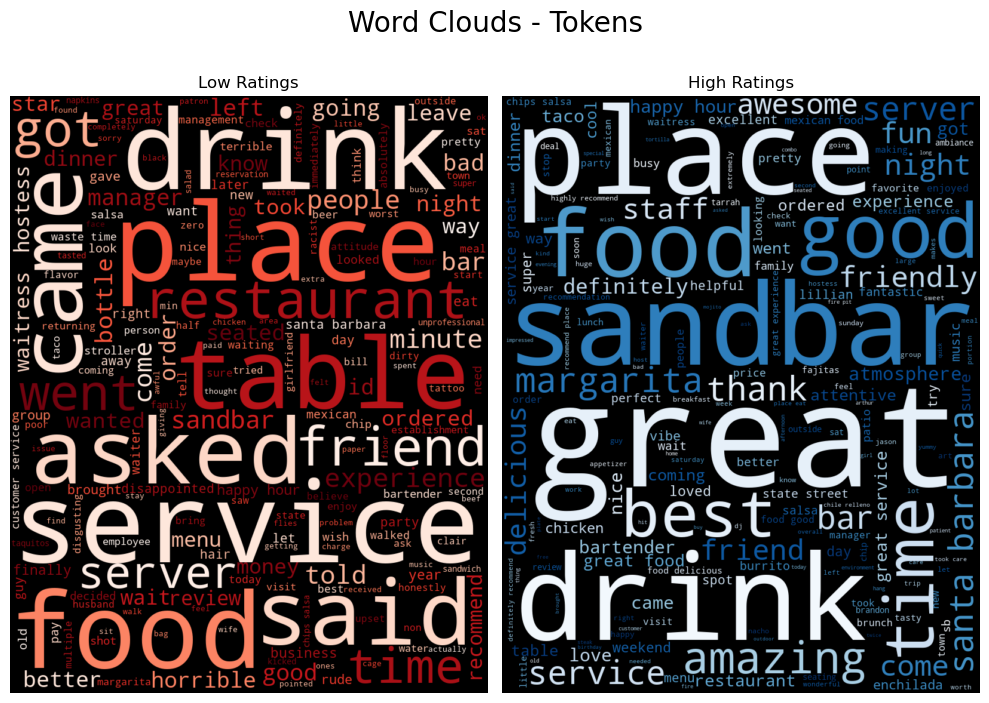

In [39]:
# Make word clouds of processed tokens
# Create an instance of a WordCloud and use the generate method
low_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2, colormap="Reds",
                     ).generate(low_reviews_tokens)
high_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,
                       colormap="Blues",
                      ).generate(high_reviews_tokens)
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(low_cloud, interpolation='bilinear')
axes[0].set_title("Low Ratings")
axes[1].imshow(high_cloud, interpolation='bilinear')
axes[1].set_title("High Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('Word Clouds - Tokens', fontsize=20, y=1.05);

In [40]:
# Word Clouds of Lemmas

In [41]:
# Make a single giant string with entire group of 5 star lemmas
high_reviews_lemmas = " ".join( reviews.loc[filter_high, 'lemmas-joined'])
# Make a single giant string with entire group of 1 star lemmas
low_reviews_lemmas= " ".join( reviews.loc[filter_low, 'lemmas-joined'])

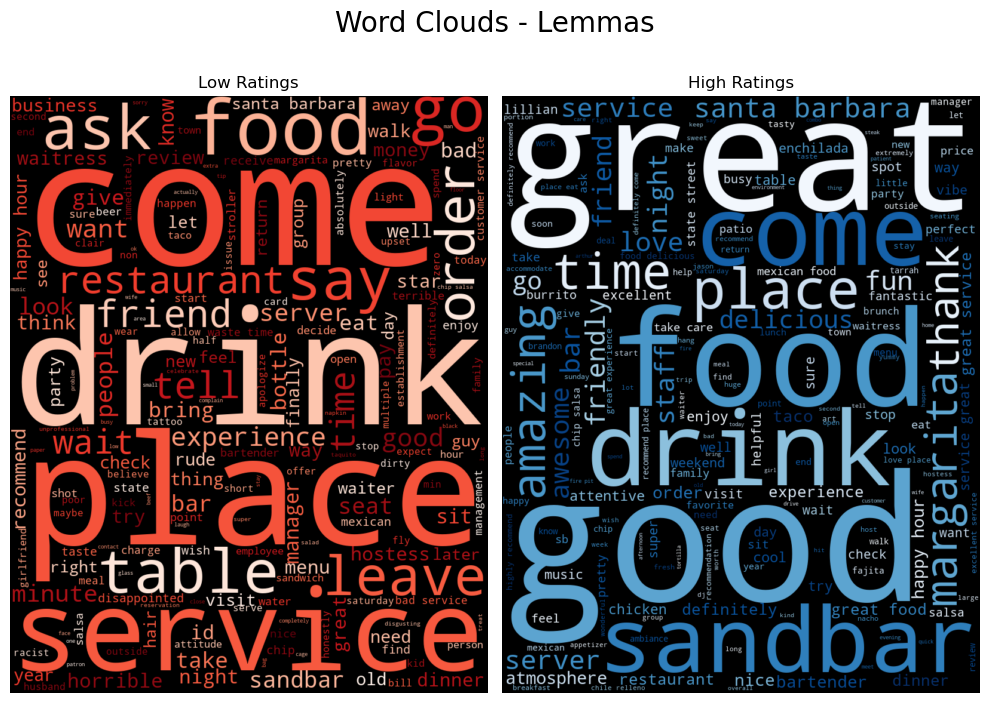

In [42]:
# Make word clouds of lemmas
# Create an instance of a WordCloud and use the generate method
low_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2, colormap="Reds",
                     ).generate(low_reviews_lemmas)
high_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,
                       colormap="Blues",
                      ).generate(high_reviews_lemmas)
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(low_cloud, interpolation='bilinear')
axes[0].set_title("Low Ratings")
axes[1].imshow(high_cloud, interpolation='bilinear')
axes[1].set_title("High Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('Word Clouds - Lemmas', fontsize=20, y=1.05);

In [43]:
from wordcloud import STOPWORDS
custom_stopwords = ['good', 'great', 'Sandbar', 'Santa', 'Barbara', 'place', 'come', 'drink']

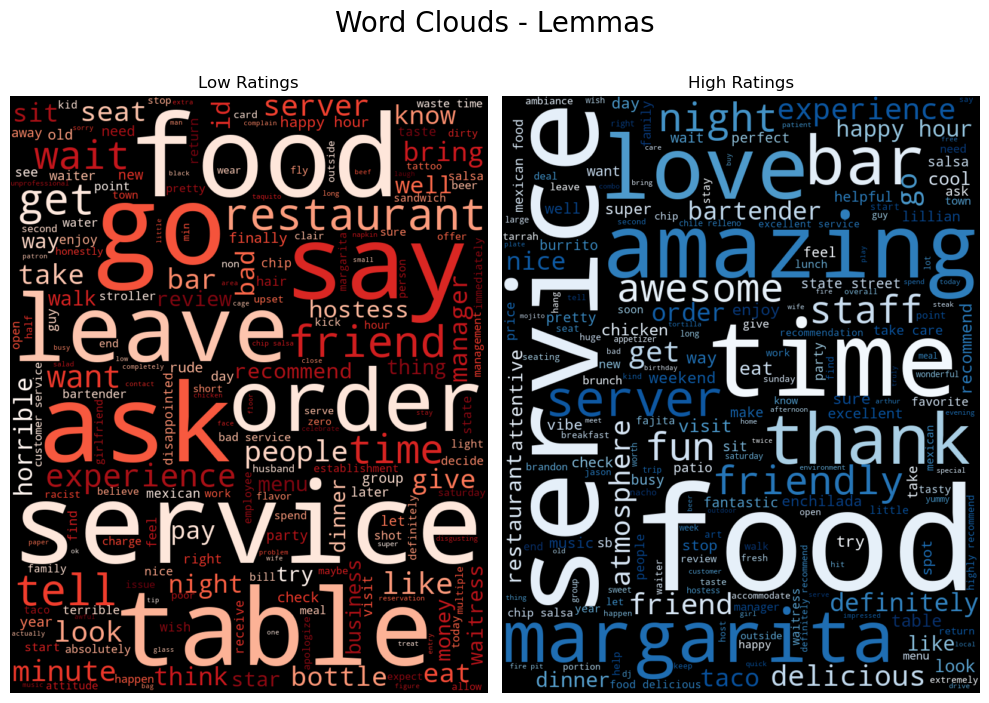

In [44]:
# Make word clouds of lemmas with custom stopwords
# Create an instance of a WordCloud and use the generate method
low_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2, colormap="Reds",
                      stopwords = custom_stopwords
                     ).generate(low_reviews_lemmas)
high_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,
                       colormap="Blues",
                       stopwords = custom_stopwords
                      ).generate(high_reviews_lemmas)
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(low_cloud, interpolation='bilinear')
axes[0].set_title("Low Ratings")
axes[1].imshow(high_cloud, interpolation='bilinear')
axes[1].set_title("High Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('Word Clouds - Lemmas', fontsize=20, y=1.05);

**Comparing Groups: Frequency Distributions**

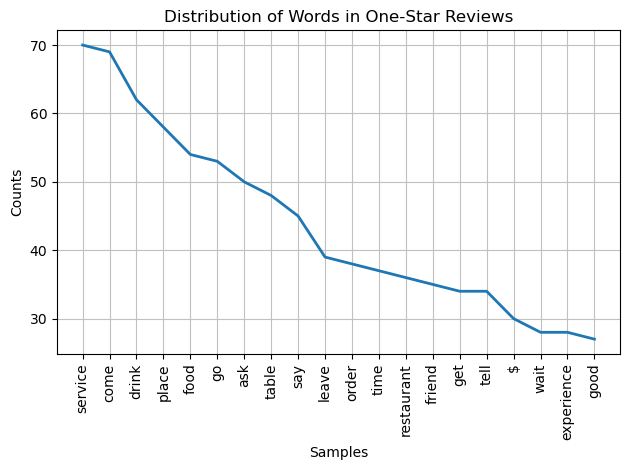

In [45]:
# Import Freqdist
from nltk.probability import FreqDist
# Split the lemmas into individual token words
low_review_lemmas_split = low_reviews_lemmas.split()
# Pass the tokenized lemmas to the class constructor and plot the distribution 
low_dist = FreqDist(low_review_lemmas_split)
ax = low_dist.plot(20, show = False, title='Distribution of Words in One-Star Reviews')
plt.tight_layout()
plt.savefig('low_review_freq_dist.png')

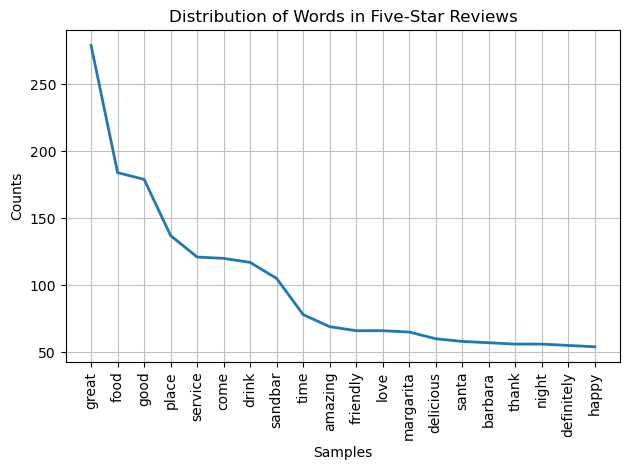

In [46]:
# Split the lemmas into individual token words
high_review_lemmas_split = high_reviews_lemmas.split()
# Pass the tokenized lemmas to the class constructor and plot the distribution 
low_dist = FreqDist(high_review_lemmas_split)
ax = low_dist.plot(20, show=False, title='Distribution of Words in Five-Star Reviews')
plt.tight_layout()
plt.savefig('high_review_freq_dist.png')

In [47]:
# Explode the lemmas in high reviews
exploded_high_review_lemmas = reviews.loc[filter_high, 'lemmas'].explode().astype(str)
exploded_high_review_lemmas.head()

review_id
78BMrY9uWMnqo34zYj9B6g    randomly
78BMrY9uWMnqo34zYj9B6g         pop
78BMrY9uWMnqo34zYj9B6g     sandbar
78BMrY9uWMnqo34zYj9B6g       spend
78BMrY9uWMnqo34zYj9B6g     morning
Name: lemmas, dtype: object

In [48]:
# Explode the lemmas in low reviews
exploded_low_review_lemmas = reviews.loc[filter_low, 'lemmas'].explode().astype(str)
exploded_low_review_lemmas.head()

review_id
J64FTyafTlA5Ct4LwHYg2g          pretty
J64FTyafTlA5Ct4LwHYg2g    disappointed
J64FTyafTlA5Ct4LwHYg2g              go
J64FTyafTlA5Ct4LwHYg2g         opening
J64FTyafTlA5Ct4LwHYg2g           night
Name: lemmas, dtype: object

In [49]:
# Convert the exploded Series into lists
high_review_lemmas_list = exploded_high_review_lemmas.to_list()
low_review_lemmas_list = exploded_low_review_lemmas.to_list()
type(high_review_lemmas_list)

list

In [50]:
# Create lists of all lemmas in both high and low review groups
high_review_lemmas_list = reviews.loc[filter_high, 'lemmas'].explode().astype(str).to_list()
low_review_lemmas_list = reviews.loc[filter_low, 'lemmas'].explode().astype(str).to_list()

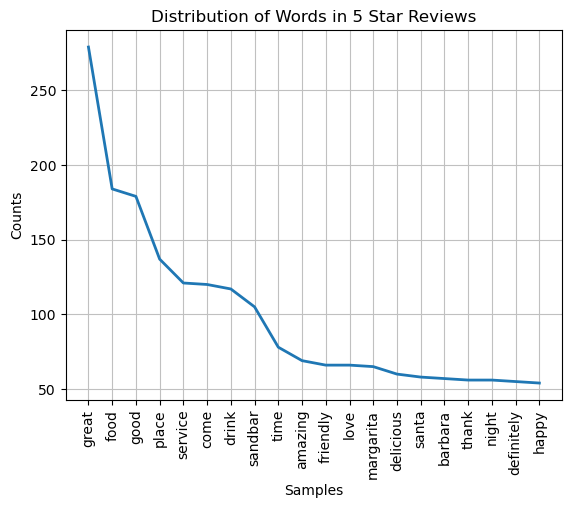

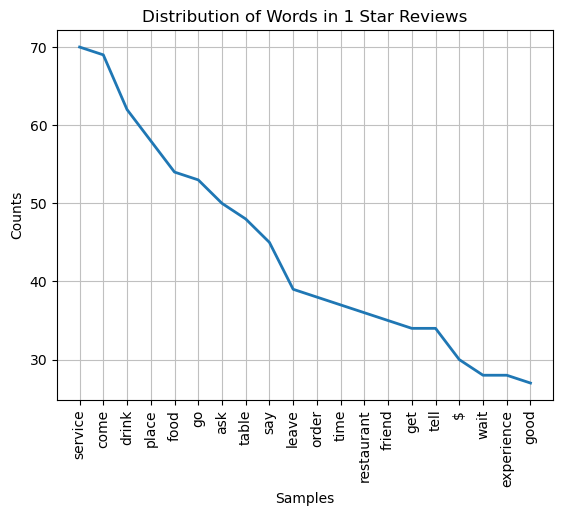

<Axes: title={'center': 'Distribution of Words in 1 Star Reviews'}, xlabel='Samples', ylabel='Counts'>

In [51]:
# Plot distribution of words in high reviews
high_dist = FreqDist(high_review_lemmas_list)
high_dist.plot(20, title='Distribution of Words in 5 Star Reviews')
# Plot distribution of words in low reviews
low_dist = FreqDist(low_review_lemmas_list)
low_dist.plot(20, title='Distribution of Words in 1 Star Reviews')

**Comparing Groups: N-grams**

In [52]:
# Method 1

# Preview first 1000 tokens in high reviews
high_reviews_tokens[: 1000]

'randomly popped sandbar spending morning shopping santa barbara completely blown away let start staff person contact happy engaging friendly great start experience ordered tacos happier ordered grilled veggie tacos spice cooled queso fresco hubby ordered chicken tacos spicy veggie ones spicy inhaled sets tacos elevated level homemade tortillas simply delicious authentic place turned years noticed bad review 2009 felt update place run completely differently food excellent staff courteous best mexican grill bar santa barbara server lillian best definitely come planning breakfast tomorrow morning margaritas margaritas margaritas great bar great service good vibes came bar twice weekend drinks margarita mojito right mistaken scott bartender friendly helpful skilled young guy nice touch sandbar free freshly baked chips salsa offered table soon seated play variable music definitely catch sport games big screens group 9 went sandbar saturday evening celebrate birthday person taking reservati

In [53]:
# Preview first 1000 tokens in low reviews
low_reviews_tokens[: 1000]

'pretty disappointed went opening night remodel good time went night group friends state id believe santa barbara tourist town going years issue az id gave credit card california sales license work license good 25yrs old rejected id lady asked passport american america caring passport bringing business ya sandbar worse service got seated right away sat waited acknowledged good 15 min couple seated near got asked drinks food order acknowledged finally waiter came took order left got chips finished waiter asked wanted said yes got chips wait food couple seated got food finally chips food worse service eat went table outside pup hostess told tie dog fence outside governor jerry brown passed law allowing behaved dogs outdoor restaurant areas leash hm visits sandbar visit week husband went friends year old drove restaurant noticed couple stroller eating restaurant kids asleep decided stroller sleeping child got hostess informed fold stroller designated stroller area restaurant agreed comple

In [54]:
# Split single string into individual list elements
high_reviews_tokens_split = high_reviews_tokens.split()
high_reviews_tokens_split[0:5]

['randomly', 'popped', 'sandbar', 'spending', 'morning']

In [55]:
# Split single string into individual list elements
low_reviews_tokens_split = low_reviews_tokens.split()
low_reviews_tokens_split[0:5]

['pretty', 'disappointed', 'went', 'opening', 'night']

In [56]:
# Method 2

# Preview our dataframe
reviews.head(2)

,date,text,stars,tokens,lemmas,tokens-joined,lemmas-joined
review_id,,,,,,,
78BMrY9uWMnqo34zYj9B6g,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,"[randomly, popped, sandbar, spending, morning, shopping, santa, barbara, completely, blown, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, ordered, tacos, happier, ordered, grilled, veggie, tacos, s...","[randomly, pop, sandbar, spend, morning, shopping, santa, barbara, completely, blow, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, order, taco, happy, order, grill, veggie, tacos, spice, cool, ques...",randomly popped sandbar spending morning shopping santa barbara completely blown away let start staff person contact happy engaging friendly great start experience ordered tacos happier ordered grilled veggie tacos spice cooled queso fresco hubby...,randomly pop sandbar spend morning shopping santa barbara completely blow away let start staff person contact happy engaging friendly great start experience order taco happy order grill veggie tacos spice cool queso fresco hubby order chicken tac...
DwVApGXXWAPBVCO6LtMG8Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,"[place, turned, years, noticed, bad, review, 2009, felt, update, place, run, completely, differently, food, excellent, staff, courteous]","[place, turn, year, notice, bad, review, 2009, feel, update, place, run, completely, differently, food, excellent, staff, courteous]",place turned years noticed bad review 2009 felt update place run completely differently food excellent staff courteous,place turn year notice bad review 2009 feel update place run completely differently food excellent staff courteous


In [57]:
# Obtain single list of tokens from all 5 star reviews
high_reviews_tokens_exploded_list = reviews.loc[filter_high, 'tokens'].explode().astype(str).to_list()
high_reviews_tokens_exploded_list[:5]

['randomly', 'popped', 'sandbar', 'spending', 'morning']

In [58]:
# Obtain single list of tokens from all 1 star reviews
low_reviews_tokens_exploded_list = reviews.loc[filter_low, 'tokens'].explode().astype(str).to_list()
low_reviews_tokens_exploded_list[:5]

['pretty', 'disappointed', 'went', 'opening', 'night']

In [59]:
# Finding and Scoring Bigrams

import nltk

# Instantiate a measures objects for Bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [60]:
# Create a finder for the high reviews
bigram_finder_high = nltk.BigramCollocationFinder.from_words(high_reviews_tokens_exploded_list)

In [61]:
# Obtain scores for the bigrams using the score_ngrams method 
# Include the desired scoring method of the measures object
bigrams_scores_high = bigram_finder_high.score_ngrams(bigram_measures.raw_freq)
bigrams_scores_high[:10]

[(('santa', 'barbara'), 0.0070913162478228415),
 (('happy', 'hour'), 0.004976362279173924),
 (('great', 'food'), 0.003981089823339139),
 (('great', 'service'), 0.003981089823339139),
 (('service', 'great'), 0.002861408310525006),
 (('food', 'great'), 0.0026125901965663102),
 (('state', 'street'), 0.002363772082607614),
 (('mexican', 'food'), 0.002239363025628266),
 (('chips', 'salsa'), 0.0018661358546902215),
 (('food', 'good'), 0.0018661358546902215)]

In [62]:
# Create a finder for the low reviews
bigram_finder_low = nltk.BigramCollocationFinder.from_words(low_reviews_tokens_exploded_list)

# Obtain scores for the bigrams using the score_ngrams method 
# Include the desired scoring method of the measures object
bigrams_scores_low = bigram_finder_low.score_ngrams(bigram_measures.raw_freq)
bigrams_scores_low[:10]

[(('happy', 'hour'), 0.0029209263509284373),
 (('santa', 'barbara'), 0.0022950135614437724),
 (('10', 'minutes'), 0.001669100771959107),
 (('customer', 'service'), 0.001669100771959107),
 (('waste', 'time'), 0.001669100771959107),
 (('20', 'minutes'), 0.0012518255789693302),
 (('chips', 'salsa'), 0.0012518255789693302),
 (('bad', 'service'), 0.001043187982474442),
 (('bottle', 'service'), 0.001043187982474442),
 (('hostess', 'stand'), 0.001043187982474442)]

In [63]:
# Convert list of tuples to dataframe
df_bigram_scores_high = pd.DataFrame(bigrams_scores_high, columns=['Words','Frequency'])
df_bigram_scores_high.head()

,Words,Frequency
0,"(santa, barbara)",0.007091
1,"(happy, hour)",0.004976
2,"(great, food)",0.003981
3,"(great, service)",0.003981
4,"(service, great)",0.002861


In [64]:
# Convert list of tuples to dataframe
df_bigram_scores_low = pd.DataFrame(bigrams_scores_low, columns=['Words','Frequency'])
df_bigram_scores_low.head()

,Words,Frequency
0,"(happy, hour)",0.002921
1,"(santa, barbara)",0.002295
2,"(10, minutes)",0.001669
3,"(customer, service)",0.001669
4,"(waste, time)",0.001669


In [65]:
# Combine low and high reviews score dfs and add a group name as multi-index
df_compare_bigrams = pd.concat(
    [df_bigram_scores_high, df_bigram_scores_low],
    axis=1,
    keys=["High Rating Reviews", "Low Rating Reviews"],
)
df_compare_bigrams.head(10)

High Rating Reviews             Low Rating Reviews          
                Words Frequency                Words Frequency
0    (santa, barbara)  0.007091        (happy, hour)  0.002921
1       (happy, hour)  0.004976     (santa, barbara)  0.002295
2       (great, food)  0.003981        (10, minutes)  0.001669
3    (great, service)  0.003981  (customer, service)  0.001669
4    (service, great)  0.002861        (waste, time)  0.001669
5       (food, great)  0.002613        (20, minutes)  0.001252
6     (state, street)  0.002364       (chips, salsa)  0.001252
7     (mexican, food)  0.002239       (bad, service)  0.001043
8      (chips, salsa)  0.001866    (bottle, service)  0.001043
9        (food, good)  0.001866     (hostess, stand)  0.001043

# Bigrams - Comparing Pointwise Mutual Information


Pointwise Mutual Information (PMI) is a measure used to identify meaningful relationships between two words in the context of a larger corpus. PMI quantifies the likelihood of two words co-occurring together compared to the probability of them appearing independently. A higher PMI value suggests that the appearance of the words together is not just due to random chance, indicating a meaningful relationship or strong association between the two words.

In [66]:
# Here we use the pmi score with the score_ngrams
bigrams_pmi_high = bigram_finder_high.score_ngrams(bigram_measures.pmi)
# Repeat for low reviews
bigrams_pmi_low = bigram_finder_low.score_ngrams(bigram_measures.pmi)
# Preview results
bigrams_pmi_high[:5]

[(('100', 'miles'), 12.972620862058745),
 (('4/5', 'sold'), 12.972620862058745),
 (('80', 'comeback'), 12.972620862058745),
 (('aaron', 'boss'), 12.972620862058745),
 (('addy', 'walker'), 12.972620862058745)]

In [67]:
# df for high review pmi scores
df_bigram_scores_high = pd.DataFrame(bigrams_pmi_high, columns=['Words','PMI Score'])

# df for low review pmi scores
df_bigram_scores_low = pd.DataFrame(bigrams_pmi_low, columns=['Words','PMI Score'])


# Combine both groups and add a group name as multi-index
df_compare_bigrams_pmi = pd.concat(
    [df_bigram_scores_high, df_bigram_scores_low],
    axis=1,
    keys=["High Rating Reviews", "Low Rating Reviews"],
)
df_compare_bigrams_pmi.head(10)

High Rating Reviews               Low Rating Reviews           
                   Words  PMI Score                 Words  PMI Score
0           (100, miles)  12.972621     (10.75, superior)  12.226713
1            (4/5, sold)  12.972621         (100, lowest)  12.226713
2         (80, comeback)  12.972621     (1:40pm, weekday)  12.226713
3          (aaron, boss)  12.972621              (70, lb)  12.226713
4         (addy, walker)  12.972621         (80, degrees)  12.226713
5  (aesthetically, wise)  12.972621     (absurd, steered)  12.226713
6     (animal, shelters)  12.972621  (acting, disorderly)  12.226713
7        (annual, train)  12.972621     (additional, add)  12.226713
8        (app, insanely)  12.972621    (airport, traffic)  12.226713
9   (appealing, chances)  12.972621          (aka, jason)  12.226713

In [68]:
# Set the desired minimum frequency value
min_frequency = 3 
# Apply filter to finder for the high reviews
bigram_finder_high.apply_freq_filter(min_frequency)
# Apply filter to finder for the low reviews
bigram_finder_low.apply_freq_filter(min_frequency)

In [69]:
# Here we use the pmi score with the score_ngrams
bigrams_pmi_high = bigram_finder_high.score_ngrams(bigram_measures.pmi)
# Repeat for low reviews
bigrams_pmi_low = bigram_finder_low.score_ngrams(bigram_measures.pmi)
# Preview results
bigrams_pmi_high[:5]

[(('san', 'diego'), 11.38765836133759),
 (('bloody', 'mary'), 10.650692767171382),
 (('dance', 'floor'), 10.650692767171382),
 (('carnitas', 'benedict'), 10.38765836133759),
 (('weeks', 'ago'), 10.23565526789254)]

In [70]:
# df for high review pmi scores
df_bigram_scores_high = pd.DataFrame(bigrams_pmi_high, columns=['Words','PMI Score'])

# df for low review pmi scores
df_bigram_scores_low = pd.DataFrame(bigrams_pmi_low, columns=['Words','PMI Score'])


# Combine both groups and add a group name as multi-index
df_compare_bigrams_pmi = pd.concat(
    [df_bigram_scores_high, df_bigram_scores_low],
    axis=1,
    keys=["High Rating Reviews", "Low Rating Reviews"],
)
df_compare_bigrams_pmi.head(10)

High Rating Reviews                  Low Rating Reviews           
                  Words  PMI Score                    Words  PMI Score
0          (san, diego)  11.387658            (dress, code)  10.226713
1        (bloody, mary)  10.650693           (baggy, jeans)   9.641751
2        (dance, floor)  10.650693           (jello, shots)   9.419358
3  (carnitas, benedict)  10.387658            (beans, rice)   9.167820
4          (weeks, ago)  10.235655         (21st, birthday)   9.056788
5      (ended, staying)   9.557583       (holiday, weekend)   8.904785
6      (shredded, beef)   9.513189  (strawberry, margarita)   8.811676
7      (chile, relleno)   9.458048         (santa, barbara)   8.767282
8        (carne, asada)   9.357911          (state, street)   8.641751
9       (braised, beef)   9.250155                (15, min)   8.419358

**How It's Useful for Comparing Two Groups:**

Significance of Bigrams: Measures like PMI can help you identify bigrams that occur together more frequently than would be expected by chance. This can be particularly useful for identifying key phrases that characterize 5-star or 1-star reviews.
Identifying Unique Associations: By scoring and ranking bigrams for each group, you can identify terms that are uniquely associated with each group, giving you more nuanced insights.
Reducing Noise: Statistical measures can help filter out bigrams that don't provide much information, like common phrases that occur in both groups.


In [71]:
nltk.collocations.BigramAssocMeasures()

In [72]:
# For tri-grams
nltk.collocations.TrigramAssocMeasures()

# For quad-grams
nltk.collocations.QuadgramAssocMeasures

nltk.metrics.association.QuadgramAssocMeasures

In [73]:
nltk.collocations.BigramCollocationFinder

nltk.collocations.BigramCollocationFinder

In [74]:
# For tri-grams
nltk.collocations.TrigramCollocationFinder

# For quad-grams
nltk.collocations.QuadgramCollocationFinder

nltk.collocations.QuadgramCollocationFinder

In [75]:
import pandas as pd
def get_ngram_measures_finder(tokens, ngrams=2, measure='raw_freq', top_n=None, min_freq = 1,
                             words_colname='Words'):
    import nltk
    if ngrams == 4:
        MeasuresClass = nltk.collocations.QuadgramAssocMeasures
        FinderClass = nltk.collocations.QuadgramCollocationFinder
        
    elif ngrams == 3: 
        MeasuresClass = nltk.collocations.TrigramAssocMeasures
        FinderClass = nltk.collocations.TrigramCollocationFinder
    else:
        MeasuresClass = nltk.collocations.BigramAssocMeasures
        FinderClass = nltk.collocations.BigramCollocationFinder

    measures = MeasuresClass()
    
   
    finder = FinderClass.from_words(tokens)
    finder.apply_freq_filter(min_freq)
    if measure=='pmi':
        scored_ngrams = finder.score_ngrams(measures.pmi)
    else:
        measure='raw_freq'
        scored_ngrams = finder.score_ngrams(measures.raw_freq)

    df_ngrams = pd.DataFrame(scored_ngrams, columns=[words_colname, measure.replace("_",' ').title()])
    if top_n is not None:
        return df_ngrams.head(top_n)
    else:
        return df_ngrams

In [76]:
# Test the function to find frequency values for quad-grams in low reviews
get_ngram_measures_finder(low_reviews_tokens_exploded_list, ngrams=4, top_n=20)

,Words,Raw Freq
0,"(accidents, happen, brought, new)",0.000417
1,"(best, experience, leave, tell)",0.000417
2,"(black, hair, hair, blonde)",0.000417
3,"(blonde, accidents, happen, brought)",0.000417
4,"(brought, new, taquitos, comp)",0.000417
5,"(comp, pay, taquitos, disappointed)",0.000417
6,"(disappointed, restaurant, returning, super)",0.000417
7,"(eating, taquitos, sudden, feel)",0.000417
8,"(experience, leave, tell, going)",0.000417
9,"(feel, mouth, pull, black)",0.000417


# **Sentiment Analysis**

In [78]:
# Demonstration texts
sample_df = pd.DataFrame([
    'Pizza is good',
    'Pizza is very good',
    'Pizza is great',
    'Pizza is great!',
    'Pizza is great :-)',
    'Pizza is not bad',
    'Pizza is bad',
    'Pizza is bad!',
    'Pizza is bad!!!',
    'Pizza is a bomb',
    'Pizza is the bomb'], columns = ['text'])
sample_df

,text
0,Pizza is good
1,Pizza is very good
2,Pizza is great
3,Pizza is great!
4,Pizza is great :-)
5,Pizza is not bad
6,Pizza is bad
7,Pizza is bad!
8,Pizza is bad!!!
9,Pizza is a bomb


In [79]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import pandas as pd
# The download below only needs to be completed once
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sofiawang/nltk_data...


True

In [80]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [81]:
sample_df['sentiment_scores'] = sample_df['text'].map(sia.polarity_scores)
# Convert the column of dictionaries into separate columns
sample_df_scores = sample_df['sentiment_scores'].apply(pd.Series)
# Join the new DataFrame with the original DataFrame
sample_df = pd.concat([sample_df, sample_df_scores], axis=1).drop('sentiment_scores', axis=1)
sample_df

,text,neg,neu,pos,compound
0,Pizza is good,0.000,0.408,0.592,0.4404
1,Pizza is very good,0.000,0.484,0.516,0.4927
2,Pizza is great,0.000,0.328,0.672,0.6249
3,Pizza is great!,0.000,0.313,0.687,0.6588
4,Pizza is great :-),0.000,0.238,0.762,0.7506
5,Pizza is not bad,0.000,0.513,0.487,0.4310
6,Pizza is bad,0.636,0.364,0.000,-0.5423
7,Pizza is bad!,0.655,0.345,0.000,-0.5848
8,Pizza is bad!!!,0.686,0.314,0.000,-0.6571
9,Pizza is a bomb,0.615,0.385,0.000,-0.4939


In [82]:
reviews.head(3)

,date,text,stars,tokens,lemmas,tokens-joined,lemmas-joined
review_id,,,,,,,
78BMrY9uWMnqo34zYj9B6g,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,"[randomly, popped, sandbar, spending, morning, shopping, santa, barbara, completely, blown, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, ordered, tacos, happier, ordered, grilled, veggie, tacos, s...","[randomly, pop, sandbar, spend, morning, shopping, santa, barbara, completely, blow, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, order, taco, happy, order, grill, veggie, tacos, spice, cool, ques...",randomly popped sandbar spending morning shopping santa barbara completely blown away let start staff person contact happy engaging friendly great start experience ordered tacos happier ordered grilled veggie tacos spice cooled queso fresco hubby...,randomly pop sandbar spend morning shopping santa barbara completely blow away let start staff person contact happy engaging friendly great start experience order taco happy order grill veggie tacos spice cool queso fresco hubby order chicken tac...
DwVApGXXWAPBVCO6LtMG8Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,"[place, turned, years, noticed, bad, review, 2009, felt, update, place, run, completely, differently, food, excellent, staff, courteous]","[place, turn, year, notice, bad, review, 2009, feel, update, place, run, completely, differently, food, excellent, staff, courteous]",place turned years noticed bad review 2009 felt update place run completely differently food excellent staff courteous,place turn year notice bad review 2009 feel update place run completely differently food excellent staff courteous
J64FTyafTlA5Ct4LwHYg2g,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,"[pretty, disappointed, went, opening, night, remodel, good, time, went, night, group, friends, state, id, believe, santa, barbara, tourist, town, going, years, issue, az, id, gave, credit, card, california, sales, license, work, license, good, 25...","[pretty, disappointed, go, opening, night, remodel, good, time, go, night, group, friend, state, id, believe, santa, barbara, tourist, town, go, year, issue, az, id, give, credit, card, california, sale, license, work, license, good, 25yr, old, r...",pretty disappointed went opening night remodel good time went night group friends state id believe santa barbara tourist town going years issue az id gave credit card california sales license work license good 25yrs old rejected id lady asked pas...,pretty disappointed go opening night remodel good time go night group friend state id believe santa barbara tourist town go year issue az id give credit card california sale license work license good 25yr old reject id lady ask passport american ...


In [83]:
# Add sentiment scores to the reviews df
reviews['sentiment_scores'] = reviews['text'].map(sia.polarity_scores)
# Convert the column of dictionaries into separate columns
review_scores = reviews['sentiment_scores'].apply(pd.Series)
# Join the new DataFrame with the original DataFrame
reviews = pd.concat([reviews, review_scores], axis=1).drop('sentiment_scores', axis=1)
reviews.head(1)

,date,text,stars,tokens,lemmas,tokens-joined,lemmas-joined,neg,neu,pos,compound
review_id,,,,,,,,,,,
78BMrY9uWMnqo34zYj9B6g,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,"[randomly, popped, sandbar, spending, morning, shopping, santa, barbara, completely, blown, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, ordered, tacos, happier, ordered, grilled, veggie, tacos, s...","[randomly, pop, sandbar, spend, morning, shopping, santa, barbara, completely, blow, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, order, taco, happy, order, grill, veggie, tacos, spice, cool, ques...",randomly popped sandbar spending morning shopping santa barbara completely blown away let start staff person contact happy engaging friendly great start experience ordered tacos happier ordered grilled veggie tacos spice cooled queso fresco hubby...,randomly pop sandbar spend morning shopping santa barbara completely blow away let start staff person contact happy engaging friendly great start experience order taco happy order grill veggie tacos spice cool queso fresco hubby order chicken tac...,0.016,0.865,0.119,0.909


In [84]:
# Define filter for positive reviews
pos_sentiment_reviews = reviews['compound'] > 0
pos_sentiment_reviews.sum()

325

In [85]:
# Identify reviews with a positive sentiment score that received 1 star
filter_mismatch_A = (reviews['stars'] == 1) & pos_sentiment_reviews
pos_sent_1_star = reviews.loc[filter_mismatch_A,['text','stars','compound']]
pos_sent_1_star.head()

,text,stars,compound
review_id,,,
J64FTyafTlA5Ct4LwHYg2g,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,0.9089
mohEBA-jhJD2hA-DMXSlVA,We just went to get a table outside with our pup and the hostess told us we could tie our dog up to the fence on the outside. Governor Jerry Brown passed a law in CA allowing well behaved dogs to be in outdoor restaurant areas on a leash. Hm!?,1,0.3382
zMqNWPS6TZ6Di4dtFThfkQ,After many visits to the Sandbar the last visit might be the last. Last week my husband and I went with our two friends. They have a two year old and so do we. Has we drove by the restaurant we noticed there was a couple with a stroller eating at...,1,0.8972
nD1jsduurtESBlToiYCBZw,"My friend and I went to Sandbar yesterday to grab drinks and check out the new remodel. The pictures looked awesome, so we wanted to see it for ourselves. We were happy to see it wasn't very busy and were seated at a table outside but near the ba...",1,0.9223
vrBzMj30bujvHY0bXkIURA,"This place will receive no stars from me... We were walking up state street with our daughters on Saturday before Father's Day and stumbled across this place... They were able to seat is quickly so we decided to try it... The food was ok, but the...",1,0.8892


In [86]:
pos_sent_1_star.loc['nD1jsduurtESBlToiYCBZw']

text        My friend and I went to Sandbar yesterday to grab drinks and check out the new remodel. The pictures looked awesome, so we wanted to see it for ourselves. We were happy to see it wasn't very busy and were seated at a table outside but near the ba...
stars                                                                                                                                                                                                                                                               1
compound                                                                                                                                                                                                                                                       0.9223
Name: nD1jsduurtESBlToiYCBZw, dtype: object

In [87]:
# Identify 5 star reviews with negative sentiment
filter_mismatch_B = (reviews['stars'] == 5) & ~pos_sentiment_reviews
reviews.loc[filter_mismatch_B,['text','stars','compound']].head()

,text,stars,compound
review_id,,,
WWK-xPzQ0eZIc0L-AivItA,"Red is awesome! This girl rocks. I wish every bar had a red. Her drinks are the best. Dirty martinis are not my ""jam"" but reds dirty martinis are bomb! She is a Rockstar",5,-0.6892
9gSf7-PctRAPme3XwXkLVg,"We try to get here whenever in Santa Barbara. A ""perfect"" margarita (or 3!) and shrimp tacos and you'll be jonesing for it soon after. Miranda the hostess could not be a better representative of Sandbar!",5,-0.4570
